<a href="https://colab.research.google.com/github/TharinduGee/Prediction_Models/blob/replaced-null-by-0-for-targets/Corbon_emission_predictor_Only_using_numeric_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt;
import tensorflow as tf;

In [131]:
record = pd.read_excel('https://www.epa.gov/system/files/documents/2022-04/22-tstcar-2022-04-15.xlsx');


In [132]:
record = record.dropna(thresh = 3000, axis='columns')
#record = record.fillna(method= 'ffill',axis='rows')


In [133]:
for column in record:
  print(column , record[column].isna().sum())

Model Year 0
Vehicle Manufacturer Name 0
Veh Mfr Code 0
Represented Test Veh Make 0
Represented Test Veh Model 0
Test Vehicle ID 0
Test Veh Configuration # 0
Test Veh Displacement (L) 0
Actual Tested Testgroup 0
Vehicle Type 0
Rated Horsepower 0
# of Cylinders and Rotors 264
Engine Code 0
Tested Transmission Type Code 0
Tested Transmission Type 0
# of Gears 0
Transmission Lockup? 0
Drive System Code 0
Drive System Description 0
Transmission Overdrive Code 0
Transmission Overdrive Desc 0
Equivalent Test Weight (lbs.) 0
Axle Ratio 0
N/V Ratio 0
Shift Indicator Light Use Cd 0
Shift Indicator Light Use Desc 0
Test Number 0
Test Originator 0
Analytically Derived FE? 0
Test Procedure Cd 0
Test Procedure Description 0
Test Fuel Type Cd 0
Test Fuel Type Description 0
Test Category 0
THC (g/mi) 799
CO (g/mi) 783
CO2 (g/mi) 369
NOx (g/mi) 797
CH4 (g/mi) 1078
RND_ADJ_FE 121
FE_UNIT 0
DT-Inertia Work Ratio Rating 344
DT-Absolute Speed Change Ratg 344
DT-Energy Economy Rating 344
Target Coef A (lbf

In [134]:
train_record = record.sample(frac = 0.8, random_state = 3)
test_record = record.drop(train_record.index)



In [135]:
numeric_feature_names = []
for name in record.columns:
  if record[name].dtype != object:
    numeric_feature_names.append(name)

numeric_feature_names

['Model Year',
 'Test Veh Configuration #',
 'Test Veh Displacement (L)',
 'Rated Horsepower',
 '# of Cylinders and Rotors',
 '# of Gears',
 'Transmission Overdrive Code',
 'Equivalent Test Weight (lbs.)',
 'Axle Ratio',
 'N/V Ratio',
 'Shift Indicator Light Use Cd',
 'Test Procedure Cd',
 'Test Fuel Type Cd',
 'THC (g/mi)',
 'CO (g/mi)',
 'CO2 (g/mi)',
 'NOx (g/mi)',
 'CH4 (g/mi)',
 'RND_ADJ_FE',
 'DT-Inertia Work Ratio Rating',
 'DT-Absolute Speed Change Ratg',
 'DT-Energy Economy Rating',
 'Target Coef A (lbf)',
 'Target Coef B (lbf/mph)',
 'Target Coef C (lbf/mph**2)',
 'Set Coef A (lbf)',
 'Set Coef B (lbf/mph)',
 'Set Coef C (lbf/mph**2)']

In [136]:
train_numeric_features = train_record[numeric_feature_names]
test_numeric_features = test_record[numeric_feature_names]


In [137]:
train_numeric_features['# of Cylinders and Rotors']

1806    8.0
3525    6.0
1240    6.0
3129    8.0
3729    4.0
       ... 
3813    4.0
2677    NaN
4282    4.0
225     4.0
3535    6.0
Name: # of Cylinders and Rotors, Length: 3518, dtype: float64

In [138]:

train_target = train_numeric_features.pop("CO2 (g/mi)")
test_target = test_numeric_features.pop("CO2 (g/mi)")
train_numeric_features = train_numeric_features.fillna(method= 'ffill',axis='rows')
test_numeric_features = test_numeric_features.fillna(method= 'ffill',axis='rows')
#train_numeric_features.head()


In [139]:
train_record['# of Cylinders and Rotors']

1806    8.0
3525    6.0
1240    6.0
3129    8.0
3729    4.0
       ... 
3813    4.0
2677    NaN
4282    4.0
225     4.0
3535    6.0
Name: # of Cylinders and Rotors, Length: 3518, dtype: float64

In [140]:
train_target.fillna(0,inplace = True)
test_target.fillna(0,inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [141]:
tf.convert_to_tensor(train_numeric_features)

<tf.Tensor: shape=(3518, 27), dtype=float64, numpy=
array([[ 2.0220e+03,  0.0000e+00,  5.3000e+00, ..., -9.8100e+00,
        -4.4000e-02,  3.5940e-02],
       [ 2.0220e+03,  1.0000e+00,  3.4450e+00, ...,  1.8271e+01,
        -8.5910e-02,  2.0445e-02],
       [ 2.0220e+03,  0.0000e+00,  3.6000e+00, ...,  1.8260e+01,
        -2.5130e-01,  2.5700e-02],
       ...,
       [ 2.0220e+03,  0.0000e+00,  1.9840e+00, ...,  6.8800e+00,
        -1.5200e-01,  2.2130e-02],
       [ 2.0220e+03,  1.0000e+00,  2.0000e+00, ...,  4.9000e+00,
         1.5800e-01,  1.8920e-02],
       [ 2.0220e+03,  2.0000e+00,  3.4560e+00, ...,  1.1330e+01,
         2.6284e-01,  1.5807e-02]])>

In [142]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(train_numeric_features)

In [143]:
normalizer(train_numeric_features.iloc[:3])

<tf.Tensor: shape=(3, 27), dtype=float32, numpy=
array([[ 0.2510773 , -0.6461372 ,  0.27780348,  0.22277802,  1.4014672 ,
        -0.22974658,  0.25003886,  1.121919  , -0.22757186, -0.1907779 ,
        -0.17446536,  0.04349321, -1.890736  ,  0.16374011, -0.343415  ,
        -0.15741356,  2.5109627 , -0.10173492, -0.00511164, -0.02256921,
         0.01730787,  1.0968583 ,  1.8339957 ,  0.9195486 , -1.5511179 ,
        -0.46593025,  1.3915895 ],
       [ 0.2510773 ,  0.1982576 ,  0.00842676,  0.60059416,  0.2909005 ,
         1.0893039 ,  0.25003886,  0.5324757 , -0.754863  , -0.29725432,
        -0.17446536, -0.2571725 ,  0.3194214 ,  0.16374011, -0.343415  ,
        -0.15741356,  2.5109627 , -0.08380967, -0.0759674 , -0.08906016,
        -0.08337589,  0.01298299, -0.3218962 , -0.6272349 ,  0.78228235,
        -0.6043211 , -0.4441021 ],
       [ 0.2510773 , -0.6461372 ,  0.03093532,  0.93505436,  0.2909005 ,
        -0.22974658,  0.25003886, -0.35168928,  0.02009513, -0.02041564,
     

In [144]:
def get_basic_model():
  model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(56, activation='relu'),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dense(1)
  ])

  # model.compile(optimizer='adam',
  #               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
  #               metrics=['accuracy'])
  
  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [145]:
model = get_basic_model()
history = model.fit(train_numeric_features, train_target,validation_split = 0.2, verbose=4,  epochs=70, batch_size=5)

Epoch 1/70
Epoch 2/70
Epoch 3/70
Epoch 4/70
Epoch 5/70
Epoch 6/70
Epoch 7/70
Epoch 8/70
Epoch 9/70
Epoch 10/70
Epoch 11/70
Epoch 12/70
Epoch 13/70
Epoch 14/70
Epoch 15/70
Epoch 16/70
Epoch 17/70
Epoch 18/70
Epoch 19/70
Epoch 20/70
Epoch 21/70
Epoch 22/70
Epoch 23/70
Epoch 24/70
Epoch 25/70
Epoch 26/70
Epoch 27/70
Epoch 28/70
Epoch 29/70
Epoch 30/70
Epoch 31/70
Epoch 32/70
Epoch 33/70
Epoch 34/70
Epoch 35/70
Epoch 36/70
Epoch 37/70
Epoch 38/70
Epoch 39/70
Epoch 40/70
Epoch 41/70
Epoch 42/70
Epoch 43/70
Epoch 44/70
Epoch 45/70
Epoch 46/70
Epoch 47/70
Epoch 48/70
Epoch 49/70
Epoch 50/70
Epoch 51/70
Epoch 52/70
Epoch 53/70
Epoch 54/70
Epoch 55/70
Epoch 56/70
Epoch 57/70
Epoch 58/70
Epoch 59/70
Epoch 60/70
Epoch 61/70
Epoch 62/70
Epoch 63/70
Epoch 64/70
Epoch 65/70
Epoch 66/70
Epoch 67/70
Epoch 68/70
Epoch 69/70
Epoch 70/70


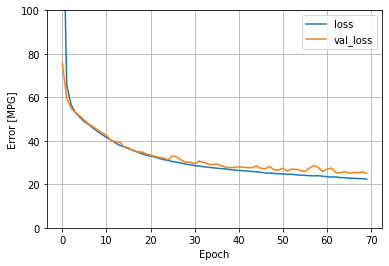

In [146]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [147]:
test_results = {}
test_results['dnn_model'] = model.evaluate(test_numeric_features, test_target, verbose=0)
pd.DataFrame(test_results, index=['Mean absolute error [CO2 (g/mi)]']).T

,Mean absolute error [CO2 (g/mi)]
dnn_model,26.76281


In [148]:
test_predictions = model.predict(test_numeric_features).flatten()


28/28 [==============================] - 0s 1ms/step
